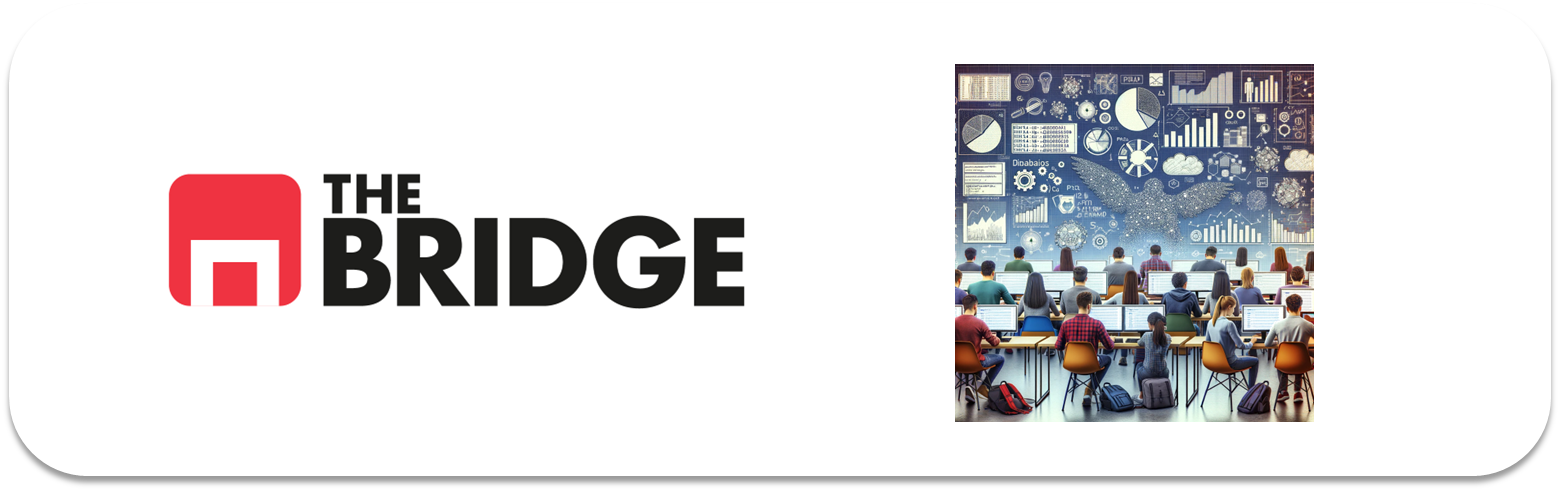

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



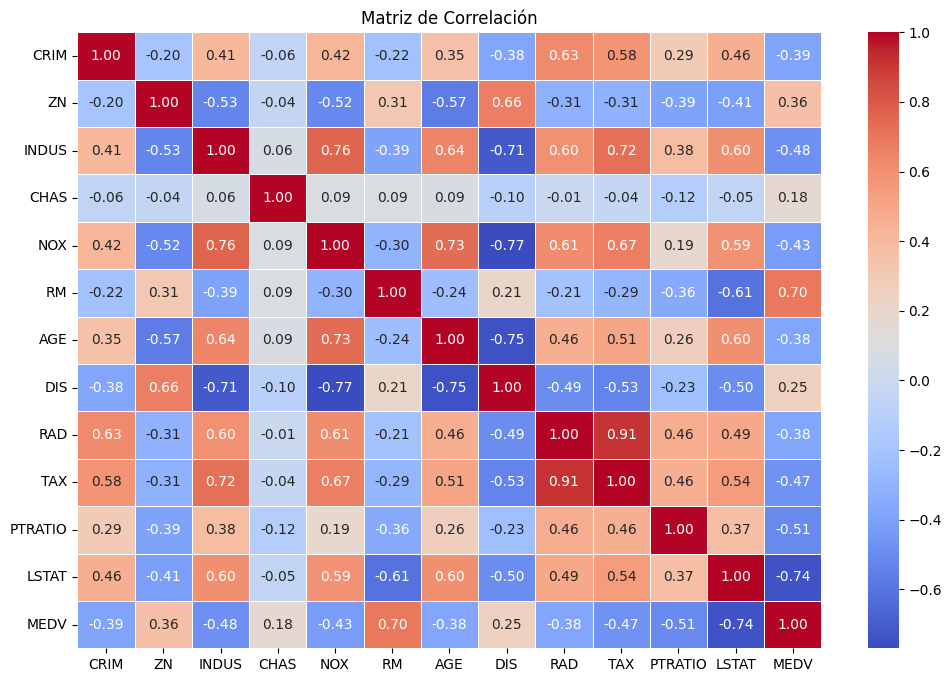

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = 'C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/DS_Online_Octubre24_Exercises/04_Machine_Learning/Sprint_10/Unidad_01/Practica_Obligatoria/obligatoria_hard.csv'
data = pd.read_csv(file_path)

# Separar la columna única en múltiples columnas utilizando '|' como delimitador
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data = data['CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV'].str.split('|', expand=True)
data.columns = columns

# Convertir los datos a sus tipos numéricos correspondientes
data = data.apply(pd.to_numeric, errors='coerce')

# Resumen estadístico del dataset
summary_stats = data.describe()

# Guardar el resumen estadístico en un archivo CSV
summary_stats.to_csv('resumen_estadistico.csv', index=True)

# Matriz de correlación para identificar relaciones entre variables
correlation_matrix = data.corr()

# Mostrar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


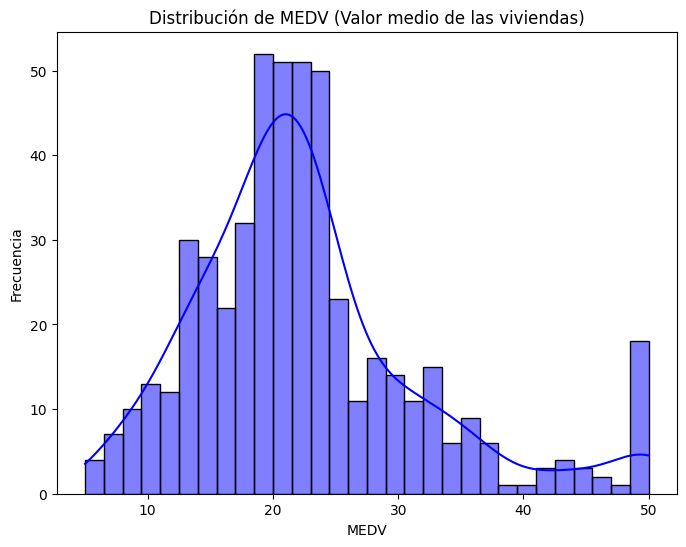

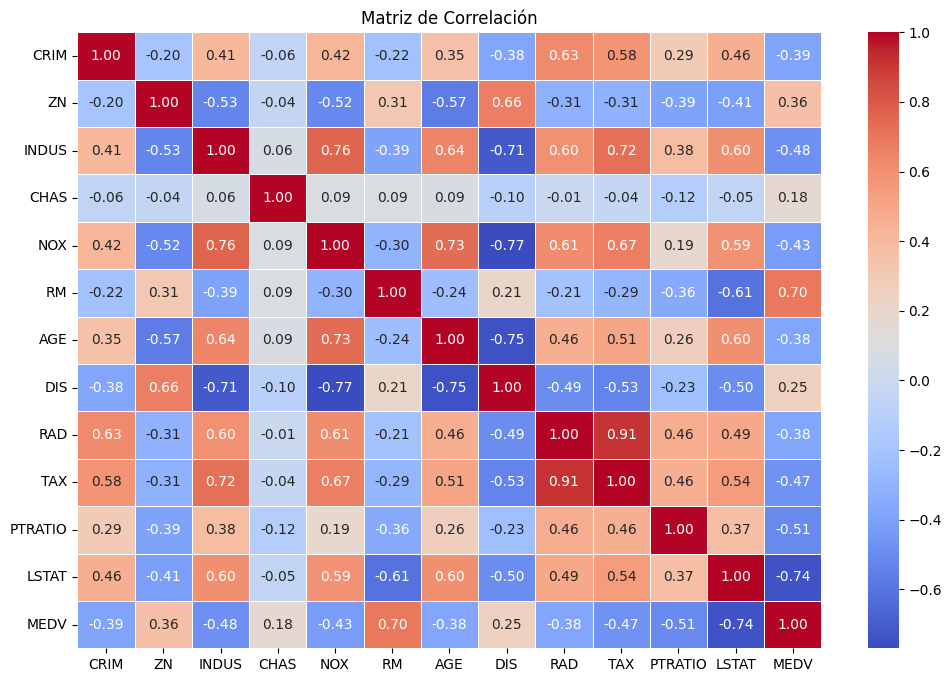

Evaluación del modelo de regresión lineal:
MAE: 3.3325380783240965
MSE: 27.114957415580566
RMSE: 5.2072024557895356
R2: 0.6302528487272829


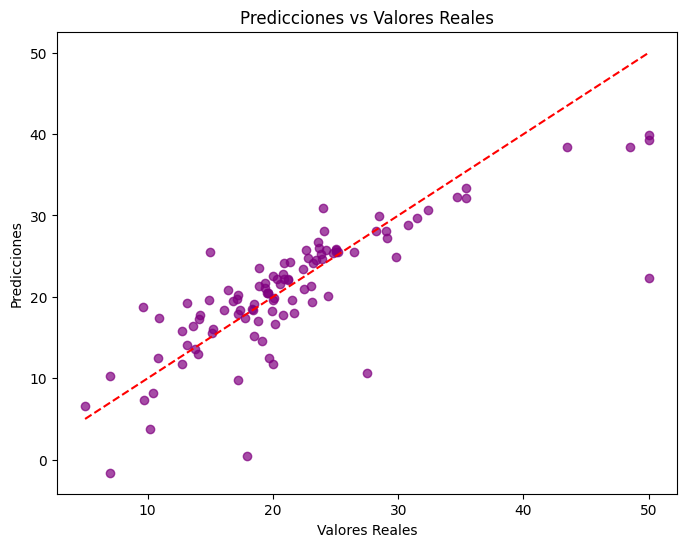

Evaluación de modelos con regularización:
Ridge MAE: 3.3318275726953126, R2: 0.6304645320468993
Lasso MAE: 3.336791862472178, R2: 0.6318293258579989
Conclusión:
El modelo Lasso es preferible, posiblemente debido a su capacidad para reducir la dimensionalidad eliminando coeficientes insignificantes.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Carga el dataset
file_path = 'C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/DS_Online_Octubre24_Exercises/04_Machine_Learning/Sprint_10/Unidad_01/Practica_Obligatoria/obligatoria_hard.csv'
data = pd.read_csv(file_path)

# Separar la columna única en múltiples columnas utilizando '|' como delimitador
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data = data['CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV'].str.split('|', expand=True)
data.columns = columns

# Convertir los datos a sus tipos numéricos correspondientes
data = data.apply(pd.to_numeric, errors='coerce')

# 2. Analizar la variable target
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribución de MEDV (Valor medio de las viviendas)')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.show()

# 3. Split en train y test
X = data.drop(columns=['MEDV'])
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Mini-EDA y selección de features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Selección basada en correlación alta con MEDV
selected_features = ['RM', 'LSTAT', 'PTRATIO']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# 6. Tratamiento de variables (Estandarización)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 8. Evaluación del modelo
y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de regresión lineal:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Comparar gráficamente predicciones vs reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# 9. Regularización con Ridge y Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Evaluación de modelos con regularización:")
print(f"Ridge MAE: {ridge_mae}, R2: {ridge_r2}")
print(f"Lasso MAE: {lasso_mae}, R2: {lasso_r2}")

# 10. Conclusiones y comparación de modelos
print("Conclusión:")
if r2 > ridge_r2 and r2 > lasso_r2:
    print("El modelo de regresión lineal simple es el más adecuado por su simplicidad y mejor R2.")
elif ridge_r2 > r2 and ridge_r2 > lasso_r2:
    print("El modelo Ridge es el mejor ya que logra el balance óptimo entre regularización y desempeño.")
elif lasso_r2 > r2 and lasso_r2 > ridge_r2:
    print("El modelo Lasso es preferible, posiblemente debido a su capacidad para reducir la dimensionalidad eliminando coeficientes insignificantes.")
